In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

Загрузка данных первого сета.

In [46]:
first_data = pd.read_csv('player_data.csv')
first_data.rename(columns={"name": "Player"}, inplace=True)
#Смотрим основные параметры.
print(first_data.shape)
print(first_data.dtypes)

(4550, 8)
Player         object
year_start      int64
year_end        int64
position       object
height         object
weight        float64
birth_date     object
college        object
dtype: object


Оцениваем что в дата-сете есть, и с чем прийдется иметь дело.

In [47]:
first_data.head(50)

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


Удалим повторяющиеся записи

In [48]:
first_data.drop_duplicates("Player", inplace=True)
first_data["Player"].value_counts()

Earnie Killum     1
Toni Kukoc        1
Jeff Foote        1
Will Frazier      1
Maurice Ndour     1
                 ..
Willie Reed       1
Mac Otten         1
A.J. Wynder       1
Julian Hammond    1
Greg Kite         1
Name: Player, Length: 4500, dtype: int64

Cмотрим насколько однородны данные и сколько пропущенных элементов в тех или иных столбцах.

In [49]:
first_data.count()

Player        4500
year_start    4500
year_end      4500
position      4499
height        4499
weight        4494
birth_date    4469
college       4198
dtype: int64

В процентном соотношении.

In [50]:
for col in first_data.columns:
    pct_missing = np.mean(first_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100, 5)))

Player - 0.0%
year_start - 0.0%
year_end - 0.0%
position - 0.02222%
height - 0.02222%
weight - 0.13333%
birth_date - 0.68889%
college - 6.71111%


Работа со столбцом height

In [51]:
def from_ft_to_m(ft):
    if pd.isna(ft):
        return
    size = ft.split("-")
    return (((int(size[0]) * 12) + int(size[1])) / 39.37008) * 100


#Перевод поля height из имперской системы в метрическую. Для удобства дальнейшей работы.
first_data["height"] = first_data["height"].apply(from_ft_to_m)

Работа со столбцом weight

In [52]:
def from_lb_to_kg(lb):
    return round(lb / 2.2046, 2)


#Перевод поля weight из имперской системы в метрическую
first_data["weight"] = first_data["weight"].apply(from_lb_to_kg)

На этом работа с первым сетом законченна, нас всё устраивает.

Загрузка данных второго сета.

In [53]:
second_data = pd.read_csv('Players.csv')
#Смотрим основные параметры.
print(second_data.shape)
print(second_data.dtypes)

(3922, 8)
Unnamed: 0       int64
Player          object
height         float64
weight         float64
collage         object
born           float64
birth_city      object
birth_state     object
dtype: object


Удалим повторяющиеся записи.

In [54]:
second_data.drop_duplicates("Player", inplace=True)
second_data["Player"].value_counts()

Earnie Killum     1
Carlos Terry      1
Jamal Murray      1
Guy Rucker        1
Robbie Hummel     1
                 ..
Sonny Parker      1
Reggie King       1
Marcus Liberty    1
James Bailey      1
Greg Kite         1
Name: Player, Length: 3921, dtype: int64

Cмотрим насколько однородны данные и сколько пропущенных элементов в тех или иных столбцах.

In [55]:
second_data.count()

Unnamed: 0     3922
Player         3921
height         3921
weight         3921
collage        3573
born           3921
birth_city     3452
birth_state    3439
dtype: int64

В процентном соотношении.

In [56]:
for col in second_data.columns:
    pct_missing = np.mean(second_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100, 5)))

Unnamed: 0 - 0.0%
Player - 0.0255%
height - 0.0255%
weight - 0.0255%
collage - 8.89852%
born - 0.0255%
birth_city - 11.98368%
birth_state - 12.31515%


Видно что есть записи в которых пропущены имена игроков, они нам не интересны, они не несут никакой пользы.

In [57]:
ind_missing = second_data[pd.isna(second_data["Player"])].index
second_data = second_data.drop(ind_missing, axis=0)

Оцениваем что в дата-сете есть, и с чем прийдется иметь дело.

In [58]:
second_data.head(50)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


Видно что столбец "Unnamed: 0" не несёт информации, удаляем его. Столбец collage написан с ошибкой, исправляем.

In [59]:
second_data.rename(columns={"collage": "college"}, inplace=True)
second_data.drop(columns=["Unnamed: 0"], inplace=True)

На этом работа со вторым сетом окончена.

Загрузка данных третьего сета.

In [60]:
third_data = pd.read_csv('Seasons_Stats.csv')
#Смотрим основные параметры.
print(second_data.shape)
print(second_data.dtypes)

(3921, 7)
Player          object
height         float64
weight         float64
college         object
born           float64
birth_city      object
birth_state     object
dtype: object


Cмотрим насколько однородны данные и сколько пропущенных элементов в тех или иных столбцах.

In [61]:
third_data.count()

Unnamed: 0    24691
Year          24624
Player        24624
Pos           24624
Age           24616
Tm            24624
G             24624
GS            18233
MP            24138
PER           24101
TS%           24538
3PAr          18839
FTr           24525
ORB%          20792
DRB%          20792
TRB%          21571
AST%          22555
STL%          20792
BLK%          20792
TOV%          19582
USG%          19640
blanl             0
OWS           24585
DWS           24585
WS            24585
WS/48         24101
blank2            0
OBPM          20797
DBPM          20797
BPM           20797
VORP          20797
FG            24624
FGA           24624
FG%           24525
3P            18927
3PA           18927
3P%           15416
2P            24624
2PA           24624
2P%           24496
eFG%          24525
FT            24624
FTA           24624
FT%           23766
ORB           20797
DRB           20797
TRB           24312
AST           24624
STL           20797
BLK           20797


В процентном соотношении.

In [62]:
for col in third_data.columns:
    pct_missing = np.mean(third_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100, 5)))

Unnamed: 0 - 0.0%
Year - 0.27135%
Player - 0.27135%
Pos - 0.27135%
Age - 0.30375%
Tm - 0.27135%
G - 0.27135%
GS - 26.15528%
MP - 2.23968%
PER - 2.38953%
TS% - 0.61966%
3PAr - 23.70094%
FTr - 0.67231%
ORB% - 15.79118%
DRB% - 15.79118%
TRB% - 12.63618%
AST% - 8.65093%
STL% - 15.79118%
BLK% - 15.79118%
TOV% - 20.69175%
USG% - 20.45685%
blanl - 100.0%
OWS - 0.42931%
DWS - 0.42931%
WS - 0.42931%
WS/48 - 2.38953%
blank2 - 100.0%
OBPM - 15.77093%
DBPM - 15.77093%
BPM - 15.77093%
VORP - 15.77093%
FG - 0.27135%
FGA - 0.27135%
FG% - 0.67231%
3P - 23.34454%
3PA - 23.34454%
3P% - 37.56429%
2P - 0.27135%
2PA - 0.27135%
2P% - 0.78976%
eFG% - 0.67231%
FT - 0.27135%
FTA - 0.27135%
FT% - 3.7463%
ORB - 15.77093%
DRB - 15.77093%
TRB - 1.53497%
AST - 0.27135%
STL - 15.77093%
BLK - 15.77093%
TOV - 20.4366%
PF - 0.27135%
PTS - 0.27135%


Видно что есть записи в которых пропущены имена игроков, они нам не интересны, они не несут никакой пользы.

In [63]:
ind_missing = third_data[pd.isna(third_data["Player"])].index
third_data = third_data.drop(ind_missing, axis=0)

Удалим повторяющиеся записи

In [64]:
third_data.drop_duplicates("Player", inplace=True)
third_data.tail(500)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
20837,20837,2011.0,Wesley Johnson,SG,23.0,MIN,79.0,63.0,2069.0,10.2,...,0.696,51.0,189.0,240.0,148.0,58.0,54.0,95.0,163.0,709.0
20839,20839,2011.0,Dominique Jones,SG,22.0,DAL,18.0,0.0,135.0,10.6,...,0.824,6.0,19.0,25.0,19.0,5.0,3.0,10.0,7.0,42.0
20861,20861,2011.0,Gani Lawal,PF,22.0,PHO,1.0,0.0,2.0,-9.1,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20868,20868,2011.0,Jeremy Lin,PG,22.0,GSW,29.0,0.0,285.0,14.8,...,0.760,12.0,22.0,34.0,42.0,33.0,9.0,18.0,31.0,76.0
20907,20907,2011.0,Greg Monroe,C,20.0,DET,80.0,48.0,2222.0,18.0,...,0.622,248.0,353.0,601.0,105.0,93.0,45.0,81.0,196.0,751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24672,24672,2017.0,Troy Williams,SF,22.0,TOT,30.0,16.0,557.0,8.9,...,0.656,15.0,54.0,69.0,25.0,27.0,10.0,33.0,60.0,185.0
24675,24675,2017.0,Kyle Wiltjer,PF,24.0,HOU,14.0,0.0,44.0,6.7,...,0.500,4.0,6.0,10.0,2.0,3.0,1.0,5.0,4.0,13.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


Оцениваем что в дата-сете есть, и с чем прийдется иметь дело.

In [65]:
third_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0


Убираем все колонки игровой статистики.

In [66]:
third_data = third_data[["Year", "Player", "Pos"]]

Для удобства последующего соединения переименуем некоторые столбцы.

In [67]:
third_data.rename(columns={"Year": "year_start", "Pos": "position"}, inplace=True)

На этом работа с третьим сетом законченна.

Прейдём непосредственно к соединению даннных в один сет игроков

In [68]:
#Получаем количество уникальных имён игроков во всех трёх сетах отдельно
player_list = first_data["Player"].append(second_data["Player"]).append(third_data["Player"])
player_list.drop_duplicates(inplace=True)

print("Number of uniq players names: ", player_list.count())
data = pd.merge(left=first_data, right=second_data, on="Player", how="outer")
data = pd.merge(left=data, right=third_data, on="Player", how="outer")
#Получаем количество уникальных имён игроков после слияние
print("Number of uniq players names in merging frame:", data["Player"].count())

Number of uniq players names:  4656
Number of uniq players names in merging frame: 4656


Т.к. Количество уникальных имён выделенных отдельно, и количество уникальных имён выделенных из дата фрейма совпало, можно сделать вывод что слияние 3х массивов прошло успешно.

In [69]:
#Ф-ция для вычисления среднего значения из двух, учитывая пропуски
def mean_value(first, second):
    if pd.isna(first):
        return round(second, 2)
    elif pd.isna(second):
        return round(first, 2)
    elif pd.isna(first) and pd.isna(second):
        return "Undefined"
    else:
        return round((first + second) / 2, 2)


#Ф-ция для вычисления минимального из двух, учитывая пропуски
def min_value(first, second):
    if pd.isna(first) and pd.isna(second):
        return np.nan
    elif pd.isna(first):
        return int(second)
    elif pd.isna(second):
        return int(first)
    else:
        return round(min(int(first), int(second)))


##Ф-ция для создания списка позиция на которых успел побывать игрок
def position_list(first, second):
    if not pd.isna(first):
        first = first.split('-')
        if not pd.isna(second):
            second = second.split('-')
            return ','.join(list(set(first + second)))
        else:
            return ','.join(first)
    else:
        second = second.split('-')
        return ','.join(second)


data['position_x'] = data.apply(lambda x: position_list(x["position_x"], x["position_y"]), axis=1)

data['height'] = data.apply(lambda x: mean_value(x["height_x"], x["height_y"]), axis=1)
data['weight'] = data.apply(lambda x: mean_value(x["weight_x"], x["weight_y"]), axis=1)

data['year_start'] = np.where(data['year_start_x'] > data['year_start_y'], data['year_start_y'], data['year_start_x'])
#Разделение даты рождения на три отдельных столбца, и избавления от дубликата столбца года
date_data = data["birth_date"].str.split(' ', expand=True)
date_data.columns = ['month_of_birth', 'day_of_birth', 'year_of_birth']
date_data['day_of_birth'] = date_data['day_of_birth'].str.replace(',', '')
date_data = pd.concat([date_data, data["born"]], axis=1)
date_data['year_of_birth'] = date_data.apply(lambda x: min_value(x["year_of_birth"], x["born"]), axis=1)
date_data.drop(columns=["born"], inplace=True)
#Добавления только что созданных столбцов обратно в дата сет
data = pd.concat([data, date_data], axis=1)

In [70]:
#Переименование некоторых столбцов из временных названий
data.rename(columns={"college_x": "college", "position_x": "position"}, inplace=True)
#Изменение порядка столбцов и опускание не нужных
data = data[["Player", "year_start", "year_end", "position", "height", "weight", "day_of_birth", "month_of_birth",
             "year_of_birth", "birth_city", "college"]]

In [71]:
data.head(1000)

,Player,year_start,year_end,position,height,weight,day_of_birth,month_of_birth,year_of_birth,birth_city,college
0,Alaa Abdelnaby,1991.0,1995.0,"F,C,PF",208.14,108.43,24,June,1968.0,Cairo,Duke University
1,Zaid Abdul-Aziz,1969.0,1978.0,"F,C",205.87,106.30,7,April,1946.0,Brooklyn,Iowa State University
2,Kareem Abdul-Jabbar,1970.0,1989.0,C,218.44,102.06,16,April,1947.0,NaN,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991.0,2001.0,"PG,G",186.71,78.24,9,March,1942.0,Wilmington,Louisiana State University
4,Tariq Abdul-Wahad,1998.0,2003.0,"F,SG",198.06,101.08,3,November,1974.0,Maisons Alfort,San Jose State University
...,...,...,...,...,...,...,...,...,...,...,...
995,Connie Dierking,1959.0,1971.0,"F,C",205.87,100.35,2,October,1936.0,Brooklyn,University of Cincinnati
996,Coby Dietrick,1971.0,1983.0,"F,C",208.14,99.40,23,July,1948.0,Riverside,San Jose State University
997,Ernie DiGregorio,1974.0,1978.0,"PG,G",182.94,81.33,15,January,1951.0,North Providence,Providence College
998,Craig Dill,1968.0,1968.0,C,210.82,97.52,17,December,1944.0,NaN,University of Michigan


Посмотрим какие данные у нас получились.

Изначально посмотрим долю отсутствующих значений.

In [72]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100, 5)))
#Доли пропусков игроков нет. Доли других столбцов довольно малы, кроме пожалуй города рождения, и колледжа обучения. Но для таких, которые мало где освещаются, это вполне нормально.

Player - 0.0%
year_start - 3.35052%
year_end - 3.35052%
position - 0.0%
height - 0.0%
weight - 0.04296%
day_of_birth - 4.01632%
month_of_birth - 4.01632%
year_of_birth - 0.53694%
birth_city - 25.85911%
college - 9.83677%


Какое распределение у года начала карьеры игроков.

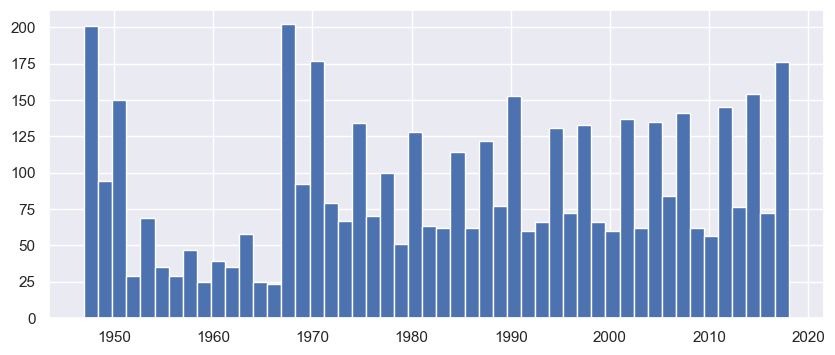

In [73]:
data["year_start"].hist(bins=50, figsize=(10, 4));
#Вроде всё стабильно

Какое распределение у года начала карьеры игроков.

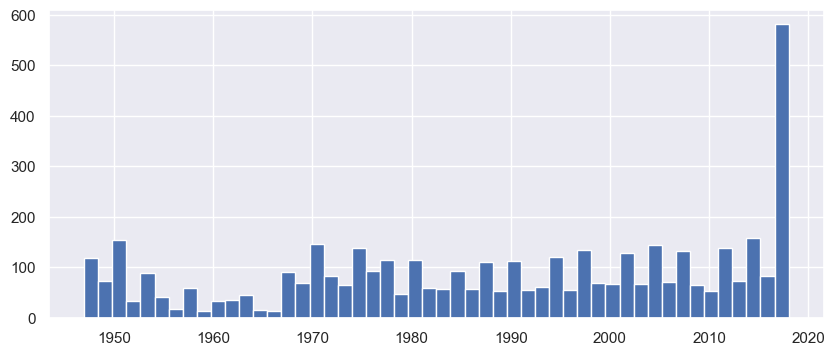

In [74]:
data["year_end"].hist(bins=50, figsize=(10, 4));

Наглядно видно большой скачок данных в конце диапазона. Посмотрим какой процент игроков ушли в этот год, и что это за год.

In [75]:
data["year_end"].value_counts(normalize=True)
#На общем процентном соотношении видно что доля ухода игроков в 2018 году, всего 10%. Учитывая что (по моему предположению) 3тий сет как раз составлен на 2018 год, считаю такой исход вполне вероятным.

2018.0    0.103778
2017.0    0.025333
1950.0    0.022667
1976.0    0.020667
2005.0    0.019333
            ...   
1965.0    0.003556
1966.0    0.003111
1959.0    0.003111
1961.0    0.002667
1967.0    0.001333
Name: year_end, Length: 72, dtype: float64

Посмотрим нет ли выбросов в столбцах веса и роста.

<AxesSubplot:>

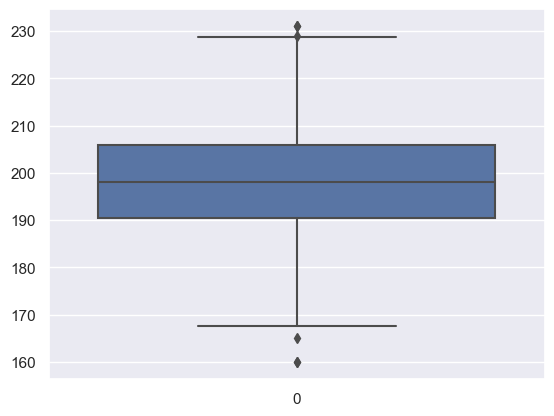

In [76]:
sns.boxplot(data["height"])
#Хоть 160 в баскетболе редко встретишь

In [77]:
data[round(data["height"]) == 160]
#Но учитывая что грубо у нас таких два игрока такое может быть, это не ошибочные данные

,Player,year_start,year_end,position,height,weight,day_of_birth,month_of_birth,year_of_birth,birth_city,college
364,Muggsy Bogues,1988.0,2001.0,"PG,G",160.01,61.34,9,January,1965.0,Baltimore,Wake Forest University
1092,Penny Early,1969.0,1969.0,G,160.02,51.71,30,May,1943.0,NaN,NaN


<AxesSubplot:>

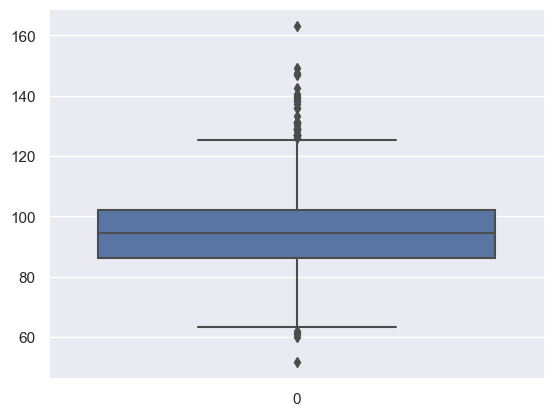

In [78]:
sns.boxplot(data["weight"])
# А вот тут видно значение меньше 60, что вызывает подозрение

In [79]:
data[data["weight"] < 60]
#Но при росте 160 вес в 52кг вполне допустим, это тоже ошибочные данные

,Player,year_start,year_end,position,height,weight,day_of_birth,month_of_birth,year_of_birth,birth_city,college
1092,Penny Early,1969.0,1969.0,G,160.02,51.71,30,May,1943.0,NaN,NaN


Проверим даты

In [80]:
temp_data = data[~pd.isna(data["day_of_birth"])]
print("Min day:", temp_data["day_of_birth"].astype(int).min())
print("Max day:", temp_data["day_of_birth"].astype(int).max())
#Видно что проблем с днями нет, они находятся в допустимых значениях

Min day: 1
Max day: 31


In [81]:
data["month_of_birth"].value_counts()
#Месяцев 12, не 13 или 14

July         416
March        397
September    392
October      386
February     376
January      372
May          366
June         366
August       363
November     355
December     348
April        332
Name: month_of_birth, dtype: int64

<AxesSubplot:>

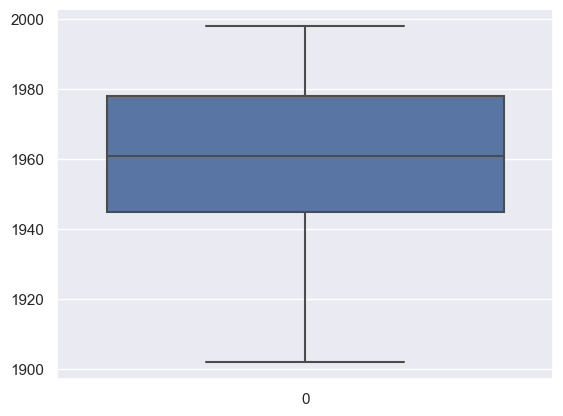

In [82]:
sns.boxplot(data["year_of_birth"])
#Аномалий в годах не обнаружено

In [83]:
data["position"].unique()
#В перечне уникальных списков позиций нет нечего что не может быть позицией игрока

array(['F,C,PF', 'F,C', 'C', 'PG,G', 'F,SG', 'F,PF', 'F,SF', 'G', 'F',
       'SG,F,G', 'SG,G', 'F,G', 'F,G,SF', 'C,F', 'C,PF', 'G,SF', 'SG,C',
       'F,C,SF', 'G,F', 'PG,F,G', 'F,SF,PF', 'SG,G,PG', 'F,G,C',
       'PG,SG,G', 'F,G,PF', 'F,SG,C', 'F,PG', 'SG,F,G,SF', 'PG', 'C,SF',
       'PF', 'SF', 'SG'], dtype=object)

Так же удалим некоторые элемент nan.

In [84]:
data["weight"].fillna(data["weight"].mean(), inplace = True)
data["height"].fillna(data["height"].mean(), inplace = True)
data["college"].fillna("Unknown",inplace=True)
data["birth_city"].fillna("Unknown",inplace=True)
data["day_of_birth"].fillna(0,inplace=True)
data["month_of_birth"].fillna("January",inplace=True)
data["year_of_birth"].fillna(0,inplace=True)

Итак мы видим что в получившемся дата сете, нет никаких аномалий, можем с ним работать дальше.

Добавим несколько фичей:

In [85]:
#Создание индекса
data["id"]= data.index.astype(int)

#Индекс массы тела
data["BMI"] = round((data["weight"] / pow(data["height"] / 100, 2)))

#Длительность карьеры
data["career_duration"] = data['year_end'] - data['year_start'] + 1

#Отклонение веса и роста от средних значений
data["weight_deviation"] = round(data["weight"] - data["weight"].mean(), 2)
data["height_deviation"] = round(data["height"] - data["height"].mean(), 2)

#Предположительный возраст в момент начала карьеры
data["start_career_age"] = data["year_start"] - data["year_of_birth"]

#Предположительный возраст на конец карьеры
data["end_career_age"] = data["year_end"] - data["year_of_birth"]

#Возможный возраст на сегодняшний день
data["age"] = 2023 - data["year_of_birth"]

#Замена категориальной фичи на числовую
months = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8,
          "September": 9, "October": 10, "November": 11, "December": 12}
data["month_of_birth"] = data["month_of_birth"].map(months)

#А сейчас бесполезная нумерология
def life_digit(day, month, year):
    if not pd.isna(day) and not pd.isna(month) and not pd.isna(year):
        day_sum = sum(map(int, str(int(day))))
        month_sum = sum(map(int, str(int(month))))
        year_sum = sum(map(int, str(int(year))))
        result = sum(map(int, str(day_sum + month_sum + year_sum)))
        if result==10:
            return 1
        else:
            return result
    else:
        return 0


data["life_digit"] = data.apply(lambda x: life_digit(x["day_of_birth"],x["month_of_birth"],x["year_of_birth"]), axis=1)
data["something_so_strange"] = pow((45*data["month_of_birth"])/(data["BMI"]*data["age"]),data["life_digit"])

data.head(50)

,Player,year_start,year_end,position,height,weight,day_of_birth,month_of_birth,year_of_birth,birth_city,...,id,BMI,career_duration,weight_deviation,height_deviation,start_career_age,end_career_age,age,life_digit,something_so_strange
0,Alaa Abdelnaby,1991.0,1995.0,"F,C,PF",208.14,108.43,24,6,1968.0,Cairo,...,0,25.0,5.0,13.99,9.99,23.0,27.0,55.0,9,4.340598e-07
1,Zaid Abdul-Aziz,1969.0,1978.0,"F,C",205.87,106.30,7,4,1946.0,Brooklyn,...,1,25.0,10.0,11.86,7.72,23.0,32.0,77.0,4,7.644817e-05
2,Kareem Abdul-Jabbar,1970.0,1989.0,C,218.44,102.06,16,4,1947.0,Unknown,...,2,21.0,20.0,7.62,20.29,23.0,42.0,76.0,5,1.824728e-05
3,Mahmoud Abdul-Rauf,1991.0,2001.0,"PG,G",186.71,78.24,9,3,1942.0,Wilmington,...,3,22.0,11.0,-16.20,-11.44,49.0,59.0,81.0,1,7.575758e-02
4,Tariq Abdul-Wahad,1998.0,2003.0,"F,SG",198.06,101.08,3,11,1974.0,Maisons Alfort,...,4,26.0,6.0,6.64,-0.09,24.0,29.0,49.0,8,5.193811e-04
5,Shareef Abdur-Rahim,1997.0,2008.0,"F,PF",205.87,102.03,11,12,1976.0,Marietta,...,5,24.0,12.0,7.59,7.72,21.0,32.0,47.0,1,4.787234e-01
6,Tom Abernethy,1977.0,1981.0,"F,SF",200.83,99.40,6,5,1954.0,South Bend,...,6,25.0,5.0,4.96,2.68,23.0,27.0,69.0,3,2.219117e-03
7,Forest Able,1957.0,1957.0,G,190.25,81.33,27,7,1932.0,Unknown,...,7,22.0,1.0,-13.11,-7.90,25.0,25.0,91.0,4,6.128948e-04
8,John Abramovic,1947.0,1948.0,F,190.50,88.45,9,2,1919.0,Unknown,...,8,24.0,2.0,-5.99,-7.65,28.0,29.0,104.0,4,1.690409e-06
9,Alex Abrines,2017.0,2018.0,"SG,F,G",198.06,86.09,1,8,1993.0,Palma de Mallorca,...,9,22.0,2.0,-8.35,-0.09,24.0,25.0,30.0,4,8.851854e-02


Когда у нас есть немного больше посчитанных данных, можем убрать неопределённости заменив их на средние значения.

In [86]:
#заполнение пробелов
data["year_start"].fillna(round(data["year_of_birth"]+data["start_career_age"].mean()),inplace=True)
data["year_end"].fillna(round(data["year_start"]+data["career_duration"].mean()),inplace=True)
data["start_career_age"].fillna(round(data["year_start"]-data["year_of_birth"]),inplace=True)
data["end_career_age"].fillna(round(data["year_end"]-data["year_of_birth"]),inplace=True)
data["career_duration"].fillna(round(data["career_duration"].mean()),inplace=True)


for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100, 5)))
#Доли пропусков нет, можем идти дальше

Player - 0.0%
year_start - 0.0%
year_end - 0.0%
position - 0.0%
height - 0.0%
weight - 0.0%
day_of_birth - 0.0%
month_of_birth - 0.0%
year_of_birth - 0.0%
birth_city - 0.0%
college - 0.0%
id - 0.0%
BMI - 0.0%
career_duration - 0.0%
weight_deviation - 0.0%
height_deviation - 0.0%
start_career_age - 0.0%
end_career_age - 0.0%
age - 0.0%
life_digit - 0.0%
something_so_strange - 0.0%


Перейдём к featuretools

In [102]:
import featuretools as ft
es = ft.EntitySet(id = 'players')

# adding a dataframe
es.entity_from_dataframe(entity_id = 'player', dataframe = data, index = 'player_1')
es.normalize_entity(base_entity_id='player', new_entity_id='player_birth', index = 'player',
            additional_variables = ['day_of_birth', 'month_of_birth', 'year_of_birth','birth_city'])

feature_matrix, feature_names = ft.dfs(entityset=es,
target_entity = 'player',
max_depth = 2,
verbose = 1,
n_jobs = 4)
print(feature_matrix.columns)
print(es.entities)

Built 113 features
EntitySet scattered to 4 workers in 3 seconds
Elapsed: 00:02 | Progress: 100%|██████████
Index(['player', 'Player', 'year_start', 'year_end', 'position', 'height',
       'weight', 'college', 'id', 'BMI',
       ...
       'player_birth.SUM(player.height)',
       'player_birth.SUM(player.height_deviation)',
       'player_birth.SUM(player.id)', 'player_birth.SUM(player.life_digit)',
       'player_birth.SUM(player.something_so_strange)',
       'player_birth.SUM(player.start_career_age)',
       'player_birth.SUM(player.weight)',
       'player_birth.SUM(player.weight_deviation)',
       'player_birth.SUM(player.year_end)',
       'player_birth.SUM(player.year_start)'],
      dtype='object', length=113)
[Entity: player
  Variables:
    player_1 (dtype: index)
    player (dtype: id)
    Player (dtype: categorical)
    year_start (dtype: numeric)
    year_end (dtype: numeric)
    position (dtype: categorical)
    height (dtype: numeric)
    weight (dtype: numeric)
   